In this project, I will analyze the data whether a mushroom is edible or poisonous based on its characteristics, such as cap shape, cap color, gill color, and more, using different classifiers

# **1-Import Libraries 📚**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

# 2- Load Dataset 🍄

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mushrooms.csv")

# **3-Data Analysis**

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
print("Dataset shape:", df.shape)

Dataset shape: (8124, 23)


In [7]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [8]:
df['class'].value_counts()

,count
class,
e,4208
p,3916


Now let’s visualize the count of edible and poisonous mushrooms using Seaborn

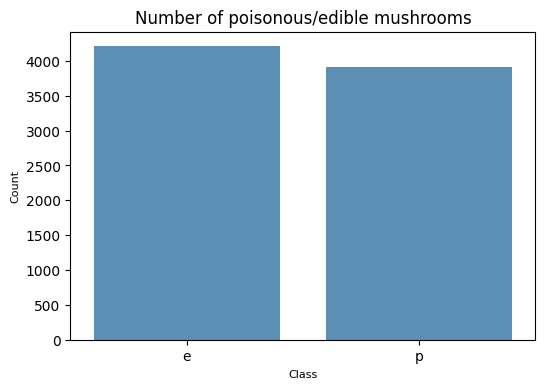

In [9]:
count = df['class'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=count.index, y=count.values, alpha=0.8)
plt.ylabel('Count', fontsize=8)
plt.xlabel('Class', fontsize=8)
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

In [10]:
df.dtypes

,0
class,object
cap-shape,object
cap-surface,object
cap-color,object
bruises,object
odor,object
gill-attachment,object
gill-spacing,object
gill-size,object
gill-color,object


# 4- Data Manipulation

The data is categorical so we’ll use LabelEncoder to convert it to ordinal. LabelEncoder converts each value in a column to a number.

In [11]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [12]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [13]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2
8123,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,4,1,2


In [14]:
df = df.drop(["veil-type"],axis=1)

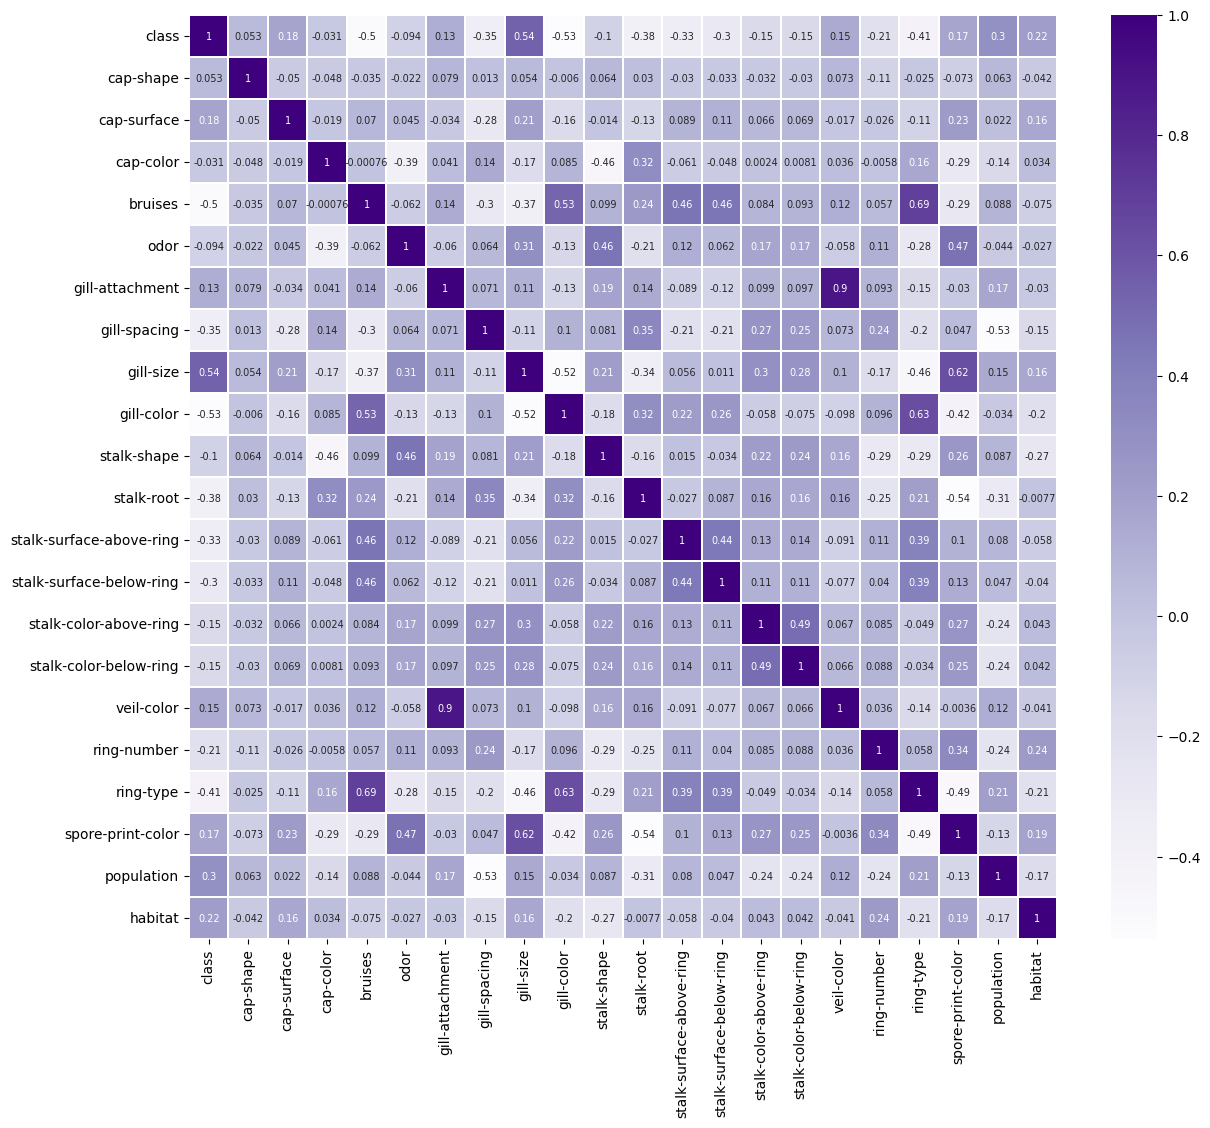

In [15]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=400, bbox_inches='tight')

Let’s look closely at the feature 'gill-color'

<ipython-input-16-8ba24a3d394f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='class', col='gill-color', data=new_var, kind='count', height=4.5, aspect=0.8, col_wrap=4, palette='Set1')


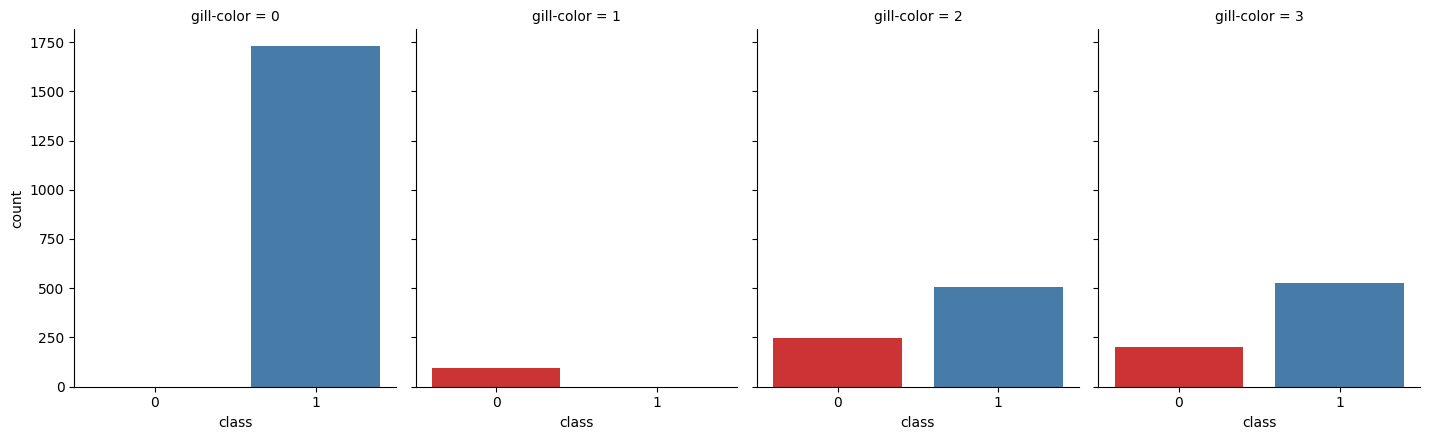

In [16]:
new_var = df[['class', 'gill-color']]
new_var = new_var[new_var['gill-color'] <= 3.5]
sns.catplot(x='class', col='gill-color', data=new_var, kind='count', height=4.5, aspect=0.8, col_wrap=4, palette='Set1')
plt.show()



<ipython-input-17-7bdd92fd818f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='class', col='gill-color', data=new_var, kind='count', height=4.5, aspect=0.8, col_wrap=4, palette='Set1')


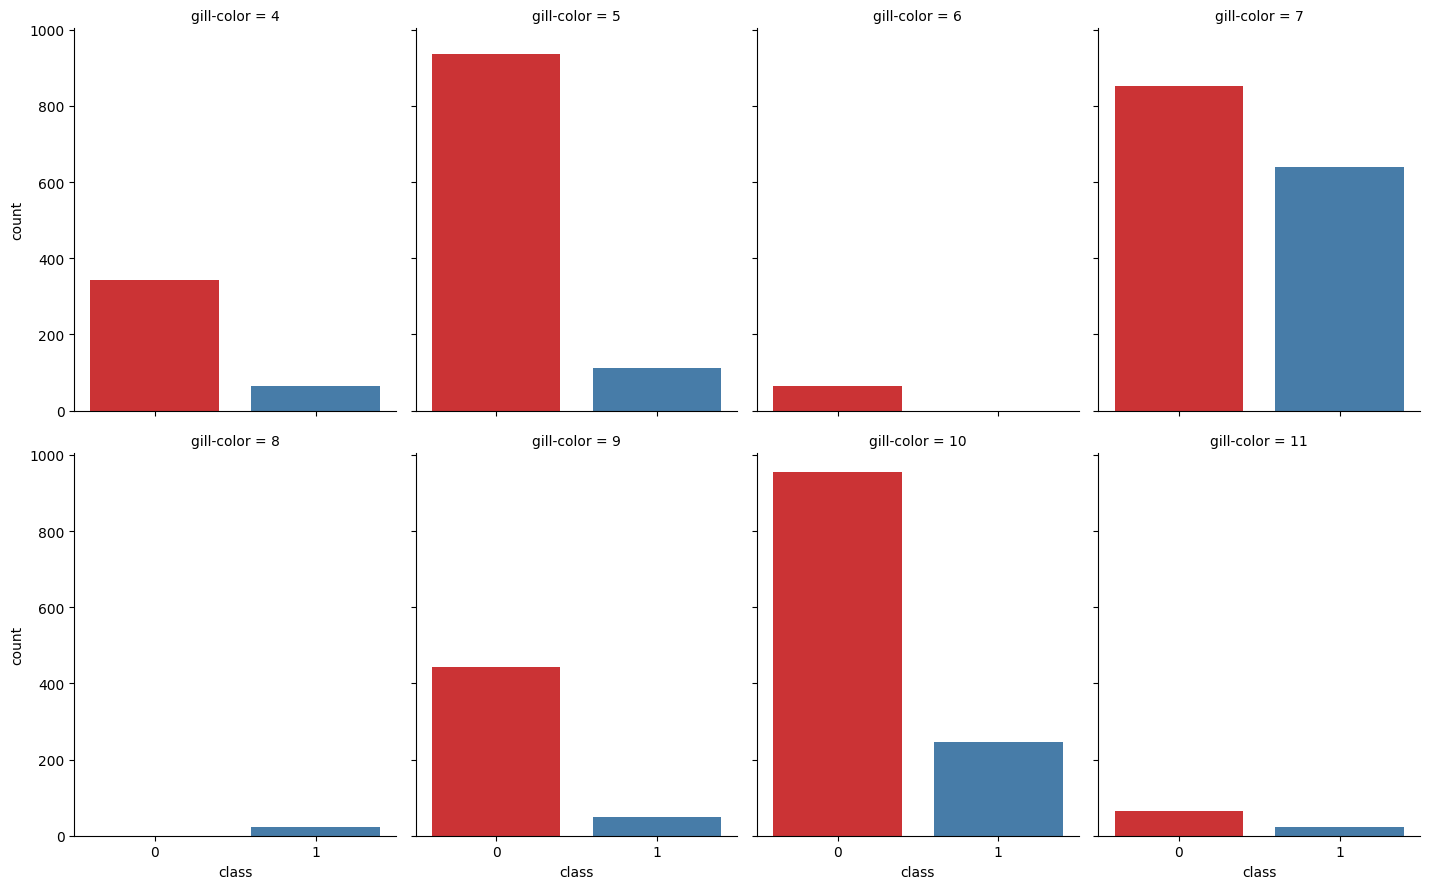

In [17]:
new_var = df[['class', 'gill-color']]
new_var = new_var[new_var['gill-color'] > 3.5]
sns.catplot(x='class', col='gill-color', data=new_var, kind='count', height=4.5, aspect=0.8, col_wrap=4, palette='Set1')
plt.show()

# 5-Preparing the Data

Since we want to predict the class of the mushroom, we will drop the 'class' column

In [18]:
X = df.drop(['class'], axis=1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

# 6-Classification Models
6.1 Decision Tree Classification

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

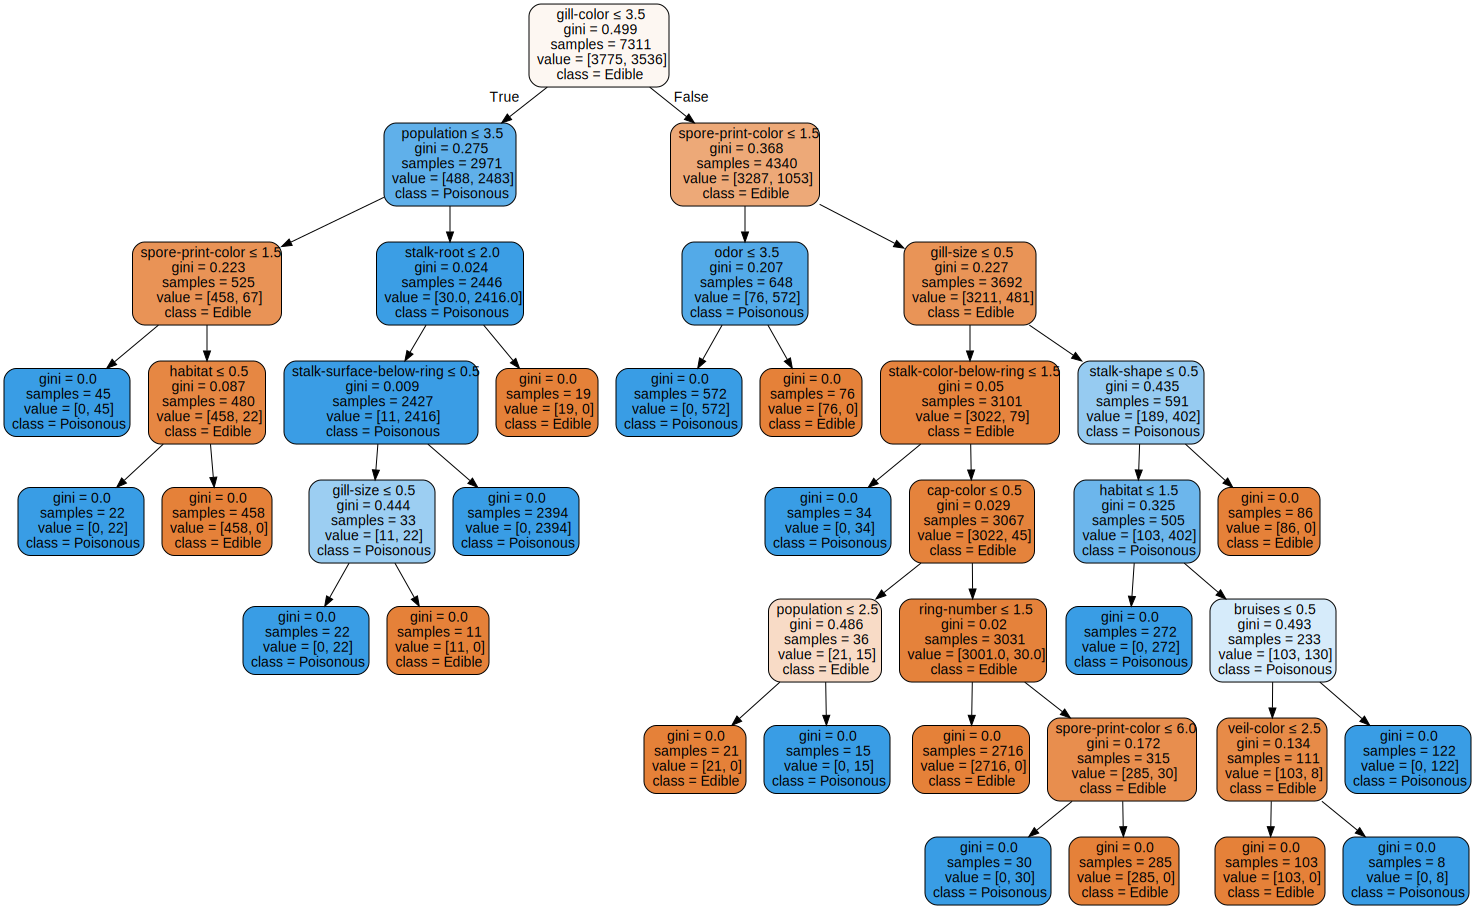

In [20]:
import os
from sklearn.tree import export_graphviz
import graphviz

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = export_graphviz(dt, out_file=None,
                           feature_names=X.columns,
                           class_names=['Edible', 'Poisonous'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph


In [21]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

Feature Importance

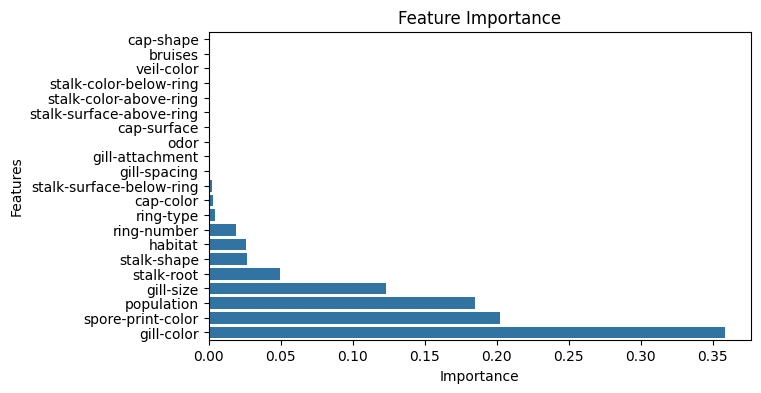

In [22]:
feature_importances = dt.feature_importances_
feature_importances_df = pd.DataFrame({'Features': X.columns, 'Importance': feature_importances})
feature_importances_df.sort_values('Importance', ascending=False, inplace=True)
feature_importances_df
plt.figure(figsize=(7, 4))
sns.barplot(x='Importance', y='Features', data=feature_importances_df)
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

Predict and estimate the score

In [23]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.99      0.96      0.98       433
           1       0.96      0.99      0.97       380

    accuracy                           0.98       813
   macro avg       0.97      0.98      0.98       813
weighted avg       0.98      0.98      0.98       813

Test Accuracy: 97.54%


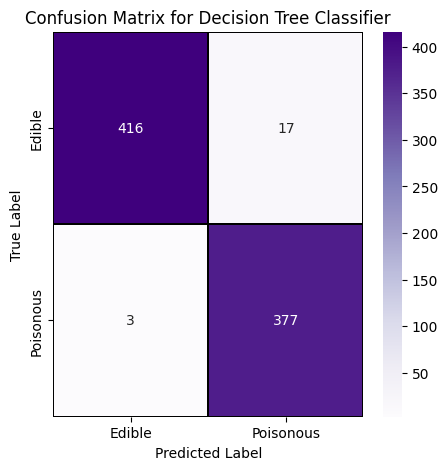

In [24]:
cm = confusion_matrix(y_test, y_pred_dt)
labels = ["Edible", "Poisonous"]

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=labels, yticklabels=labels, linecolor="black", linewidths=0.2)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

 6.2.Logistic Regression Classification

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
print(f"Test Accuracy: {lr.score(X_test, y_test) * 100:.2f}%")


Test Accuracy: 94.96%


In [26]:
#Classification report of Logistic Regression Classifier

y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.96      0.94      0.95       433
           1       0.94      0.96      0.95       380

    accuracy                           0.95       813
   macro avg       0.95      0.95      0.95       813
weighted avg       0.95      0.95      0.95       813



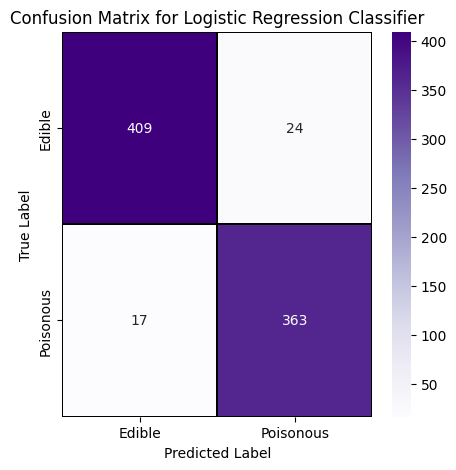

In [27]:
# Confusion Matrix for Logistic Regression Classifier

cm = confusion_matrix(y_test, y_pred_lr)
labels = ["Edible", "Poisonous"]

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=labels, yticklabels=labels, linecolor="black", linewidths=0.2)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression Classifier")
plt.show()

6.3. KNN Classification

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(f"Test Accuracy: {knn.score(X_test, y_test) * 100:.2f}%")


Test Accuracy: 99.88%


In [29]:
#Classification report of KNN Classifier

y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))


KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



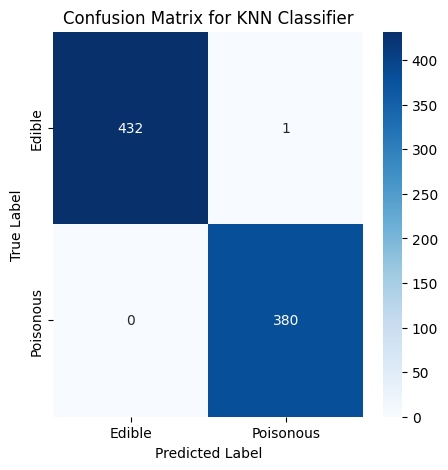

In [30]:
# Confusion Matrix for KNN

cm = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for KNN Classifier")
plt.show()






6.4.XGBoost Model

In [39]:
#parameters={'n_estimators': 297, 'max_depth': 16, 'learning_rate': 0.03906159386409017, 'subsample': 0.6935900010487451, 'colsample_bytree': 0.5171160704967471, 'gamma': 0.00013710778966124443, 'lambda': 0.0017203271581656767, 'alpha': 8.501510750413265e-06, 'scale_pos_weight': 1.0017942891559255,'enable_categorical': True,'tree_method': 'hist'}


parameters={'n_estimators': 297, 'max_depth': 19, 'learning_rate': 0.028333382496137323, 'subsample': 0.9947997083813288,
            'colsample_bytree': 0.5336230391923533,
            'gamma': 0.16126940334635828}

In [41]:
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(**parameters)

# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5336230391923533, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.16126940334635828,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.028333382496137323,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=19, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=297, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import xgboost as xgb


# Predict on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classifier report: \n\n", classification_report(y_test, y_pred_xgb))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_xgb) * 100:.2f}%")


# Split the training data to create a validation set
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# (Optional) Re-train the XGBoost model on the new training split
xgb_model.fit(X_train_split, y_train_split)

# Predict on the validation set
y_val_pred = xgb_model.predict(X_val_split)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val_split, y_val_pred)
print(f'Validation Accuracy: {accuracy:.4f}')

# Classification Report
print('Classification Report:')
print(classification_report(y_val_split, y_val_pred))

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_val_split, y_val_pred))


XGBoost Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 100.00%
Validation Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       755
           1       1.00      1.00      1.00       708

    accuracy                           1.00      1463
   macro avg       1.00      1.00      1.00      1463
weighted avg       1.00      1.00      1.00      1463

Confusion Matrix:
[[755   0]
 [  0 708]]


# Prediction

In [46]:
def print_predictions(model, X_test, y_test, num_samples=36):
    # Make predictions on the test set
    preds = model.predict(X_test)

    # Print the first few predictions and actual values
    print("Pre:", preds[:num_samples])
    print("Act:", y_test[:num_samples].values)
    print("\n# 0 - Edible\n# 1 - Poisonous\n")

# Example usage for different models
print("Decision Tree Predictions:")
print_predictions(dt, X_test, y_test)

print("XGBoost Predictions:")
print_predictions(xgb_model, X_test, y_test)

print("Logistic Regression Predictions:")
print_predictions(lr, X_test, y_test)

print("KNN Predictions:")
print_predictions(knn, X_test, y_test)


Decision Tree Predictions:
Pre: [0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]
Act: [0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]

# 0 - Edible
# 1 - Poisonous

XGBoost Predictions:
Pre: [0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]
Act: [0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]

# 0 - Edible
# 1 - Poisonous

Logistic Regression Predictions:
Pre: [0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1]
Act: [0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]

# 0 - Edible
# 1 - Poisonous

KNN Predictions:
Pre: [0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]
Act: [0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]

# 0 - Edible
# 1 - Poisonous



In [45]:
preds = dt.predict(X_test)
print(preds[:36])
print(y_test[:36].values)
# 0 - Edible
# 1 - Poisonous

[0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]
[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]


# Conclusion

As we can see, the predicted and the true values match 100%.

From the confusion matrix, we saw that our train and test data is balanced.

Most of the classification methods hit 100% accuracy with this dataset.

We can now eat healthy mushrooms!!